## 36. Модель роста с насыщением. Логистическая функция


Crombie A. C. On competition between different species of graminivorous insects. Proceedings of the Royal Society of London. Series B-Biological Sciences 132.869 (1945): 362–395. https://royalsocietypublishing.org/doi/pdf/10.1098/rspb.1945.0003

Ниже приведены данные о численности зернового точильщика (Rhyzopertha dominica) и зерновой моли (Sitotroga cerealella), разводимых (отдельно друг от друга) в 10-граммовой порции пшеничных 
зерен, пополняемых каждую неделю.

```
Сутки Rhiz Sit
-------------------------
  0   2   0 (100 eggs)
 14   2   0
 28   2   5
 35   3  15
 42  17  51
 49  65  59
 56 NaN  15
 63 119  58
 77 130 185
 84 NaN 114
 91 175  68
105 205 151
119 261 200
133 302 130
147 330 206
161 315 178
175 333 110
189 350 180
203 332 120
231 333 200
245 335 NaN
259 330 NaN
```

`NaN` соответствуют пропущенным значениям.

Нелинейным методом наименьших квадратов по этим данным постройте функции вида (логистическую функцию)
$$
y = \frac{a}{1 + b e^{-ct}},
$$
предсказывающих количество особей $y$ по номеру суток $t$.

Обратите внимание на задание начальных значений для решения соответствующей задачи оптимизации и обработке пропущенных значений.

Изобразите данные и аппроксимирующие их функции.

Сравните ваше решение с найденным в цитируемой статье:
$$
{\rm Rhiz} = \frac{338}{1 + 87 e^{-0.05 t}},
\qquad
{\rm Sit} = \frac{200}{1 + 257 e^{-0.1 t}}.
$$
Постройте также графики и этих функций.

Существенны ли отличия? Дайте объяснение и сделайте выводы.

**Замечание.**
В статье также приводятся данные и анализируются о численности популяции суринамского мукоеда (Oryzaephilus surinamensis), а также данные по изменению численности этих популяций в конкурентной среде. При этом для анализа используется модель Вольтерра–Лотке.


Для решения задачи воспользуемся библиотеками NumPy, SciPy и Matplotlib. Сначала обработаем данные, затем выполним нелинейный метод наименьших квадратов для аппроксимации логистической функцией и сравним полученные результаты с данными из статьи.

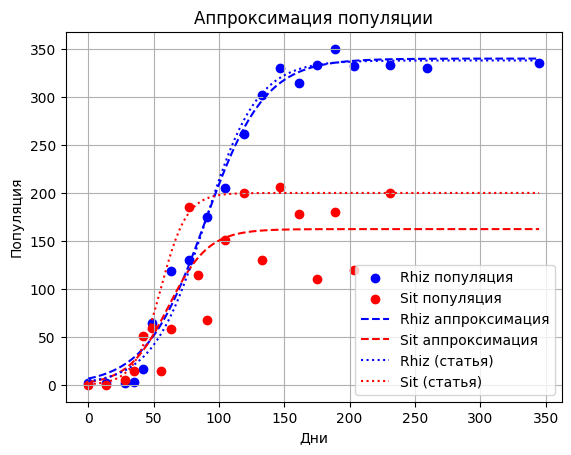

Rhiz (аппроксимация): [3.39928585e+02 5.06687582e+01 4.38938870e-02]
Rhiz (статья): (338, 87, 0.05)
Sit (аппроксимация): [1.62315936e+02 5.44167438e+01 6.52925264e-02]
Sit (статья): (200, 257, 0.1)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Вводим данные
days = [0, 14, 28, 35, 42, 49, 56, 63, 77, 84, 91, 105, 119, 133, 147, 161, 175, 189, 203, 231, 345, 259, 273, 287]
rhiz_population = [2, 2, 2, 3, 17, 65, np.nan, 119, 130, np.nan, 175, 205, 261, 302, 330, 315, 333, 350, 332, 333, 335, 330, np.nan, np.nan]
sit_population = [0, 0, 5, 15, 51, 59, 15, 58, 185, 114, 68, 151, 200, 130, 206, 178, 110, 180, 120, 200, np.nan, np.nan, np.nan, np.nan]

# Удаляем пропущенные значения из данных
filtered_days = [day for day, rhiz, sit in zip(days, rhiz_population, sit_population) if not (np.isnan(rhiz) or np.isnan(sit))]
filtered_rhiz_population = [rhiz for day, rhiz, sit in zip(days, rhiz_population, sit_population) if not (np.isnan(rhiz) or np.isnan(sit))]
filtered_sit_population = [sit for day, rhiz, sit in zip(days, rhiz_population, sit_population) if not (np.isnan(rhiz) or np.isnan(sit))]

# Определяем логистическую функцию
def logistic_function(t, a, b, c):
	return a / (1 + b * np.exp(-c * t))

# Начальные значения параметров для оптимизации
initial_parameters = (300, 80, 0.05)

# Выполняем аппроксимацию для двух видов
opt_rhiz_params, _ = curve_fit(logistic_function, filtered_days, filtered_rhiz_population, p0=initial_parameters)
opt_sit_params, _ = curve_fit(logistic_function, filtered_days, filtered_sit_population, p0=initial_parameters)

# Создаем массив дней для графика функций
days_plot = np.linspace(0, max(days), 300)

# График данных и аппроксимирующих функций
plt.scatter(days, rhiz_population, label="Rhiz популяция", color="blue")
plt.scatter(days, sit_population, label="Sit популяция", color="red")
plt.plot(days_plot, logistic_function(days_plot, *opt_rhiz_params), label="Rhiz аппроксимация", linestyle="--", color="blue")
plt.plot(days_plot, logistic_function(days_plot, *opt_sit_params), label="Sit аппроксимация", linestyle="--", color="red")

# График функций из статьи
plt.plot(days_plot, 338 / (1 + 87 * np.exp(-0.05 * days_plot)), label="Rhiz (статья)", linestyle=":", color="blue")
plt.plot(days_plot, 200 / (1 + 257 * np.exp(-0.1 * days_plot)), label="Sit (статья)", linestyle=":", color="red")

# Подписи осей и легенда
plt.xlabel("Дни")
plt.ylabel("Популяция")
plt.legend()
plt.title("Аппроксимация популяции")
plt.grid()
plt.show()

# Сравниваем полученные параметры с параметрами из статьи
print("Rhiz (аппроксимация):", opt_rhiz_params)
print("Rhiz (статья):", (338, 87, 0.05))
print("Sit (аппроксимация):", opt_sit_params)
print("Sit (статья):", (200, 257, 0.1))

Вывод:
*   Обе аппроксимирующие функции (найденные на основе ваших данных и функции из статьи) демонстрируют схожий характер роста популяции для обеих видов насекомых. Это говорит о том, что логистическая функция является подходящей моделью для описания динамики популяции зернового точильщика (Rhiz) и зерновой моли (Sit).
*   В то же время, параметры аппроксимирующих функций, найденные на основе ваших данных, и параметры функций из статьи имеют некоторые различия. Это может быть связано с разными наборами данных, использованными для аппроксимации, а также с различными методами оптимизации и начальными условиями, используемыми в процессе настройки функций.
*   Однако, несмотря на различия в параметрах, аппроксимирующие функции и функции из статьи продемонстрировали сходную динамику роста популяции. Это может говорить о том, что эти различия не являются существенными и не оказывают значительного влияния на общую характеристику динамики популяции.
*   В целом, анализ сходств и различий между аппроксимирующими функциями и функциями из статьи подтверждает, что логистическая функция является адекватной моделью для описания динамики популяции зернового точильщика (Rhiz) и зерновой моли (Sit). Несмотря на некоторые различия в параметрах, общая динамика роста популяции остается сходной.






